(probability of P-value ≤ 0.05) = 0.049884


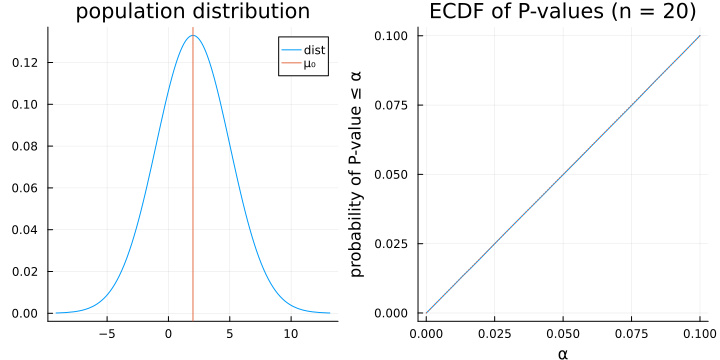

In [21]:
using Distributions
using StatsPlots
default(fmt=:png)

countecdf(A, x) = count(≤(x), A)/length(A)

function pvalue_1_sample_t_test(X, μ)
    n = length(X)
    X̄ = mean(X)
    SEhat = std(X)/√n
    t = (X̄ - μ)/SEhat
    2ccdf(TDist(n-1), abs(t))
end

dist = Normal(2, 3)
μ₀ = mean(dist)

P = plot(dist; label="dist")
vline!([μ₀]; label="μ₀")
title!("population distribution")

n = 20
niters = 10^6
pval = zeros(niters)
Threads.@threads for i in 1:niters
    X = rand(dist, n)
    pval[i] = pvalue_1_sample_t_test(X, μ₀)
end

α = 0.05
println("(probability of P-value ≤ $α) = ", countecdf(pval, α))

Q = plot(α -> countecdf(pval, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot)
plot!(xguide="α", yguide="probability of P-value ≤ α")
title!("ECDF of P-values (n = $n)")

plot(P, Q; size=(720, 360))

(probability of P-value ≤ 0.05) = 0.050013


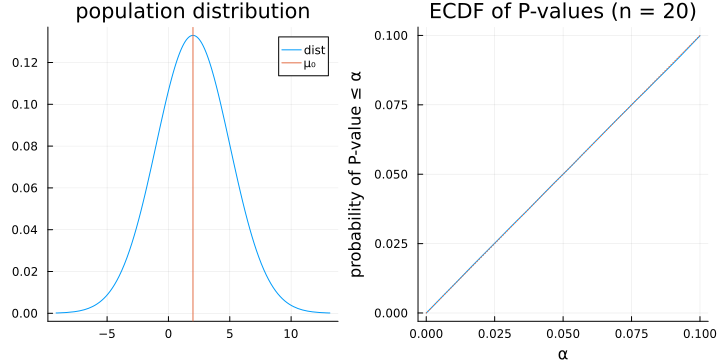

In [2]:
function plot_1_sample_t_test(; dist=Normal(2, 3), μ₀=mean(dist), n=20, α=0.05, niters=10^6)
    P = plot(dist; label="dist")
    vline!([μ₀]; label="μ₀")
    title!("population distribution")

    pval = zeros(niters)
    Threads.@threads for i in 1:niters
        X = rand(dist, n)
        pval[i] = pvalue_1_sample_t_test(X, μ₀)
    end
    
    println("(probability of P-value ≤ $α) = ", countecdf(pval, α))
    
    Q = plot(α -> countecdf(pval, α), 0, 0.1; label="")
    plot!(identity; label="", ls=:dot)
    plot!(xguide="α", yguide="probability of P-value ≤ α")
    title!("ECDF of P-values (n = $n)")

    plot(P, Q; size=(720, 360))
end

plot_1_sample_t_test(dist = Normal(2, 3), n = 20)

(probability of P-value ≤ 0.05) = 0.05122


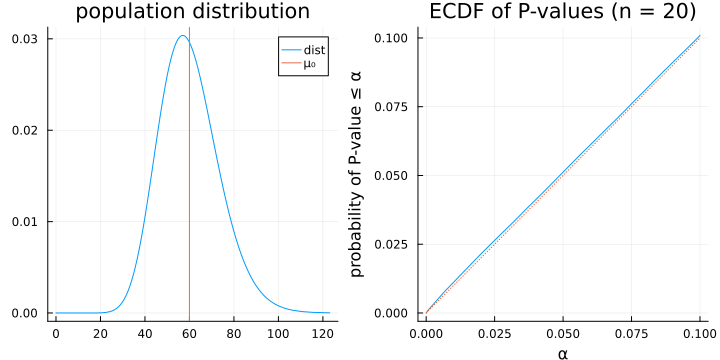

In [3]:
plot_1_sample_t_test(; dist = Gamma(20, 3), n = 20)

(probability of P-value ≤ 0.05) = 0.066188


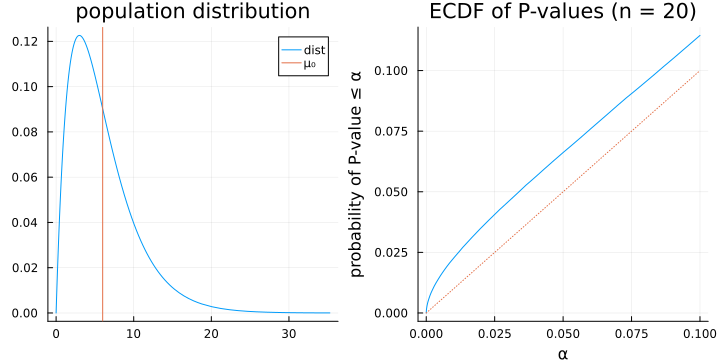

In [4]:
plot_1_sample_t_test(; dist = Gamma(2, 3), n = 20)

(probability of P-value ≤ 0.05) = 0.052086


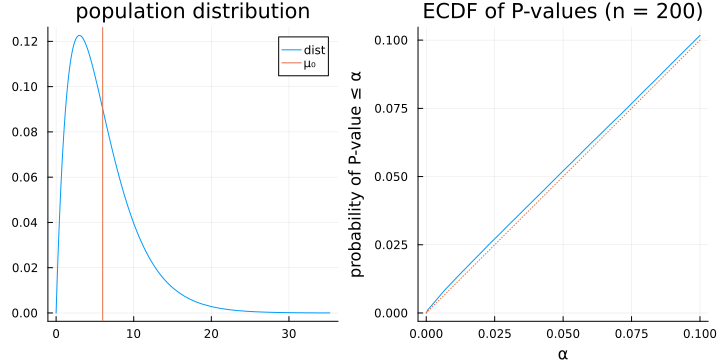

In [5]:
plot_1_sample_t_test(; dist = Gamma(2, 3), n = 200)

(probability of P-value ≤ 0.05) = 0.135779


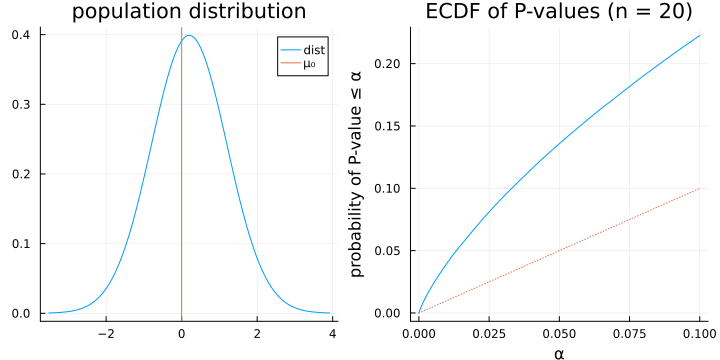

In [6]:
plot_1_sample_t_test(; dist = Normal(0.2, 1), μ₀ = 0, n = 20)

(probability of P-value ≤ 0.05) = 0.283839


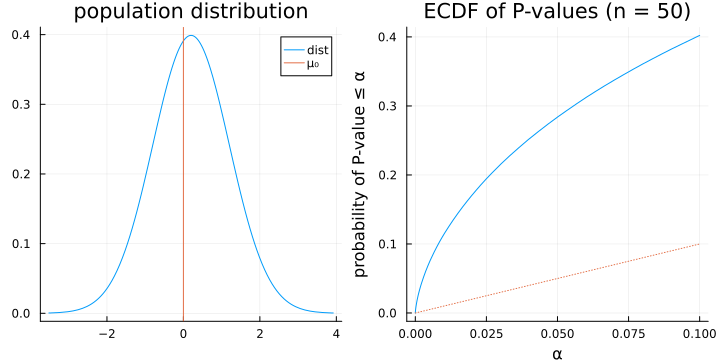

In [7]:
plot_1_sample_t_test(; dist = Normal(0.2, 1), μ₀ = 0, n = 50)

(probability of P-value ≤ 0.05) = 0.508995


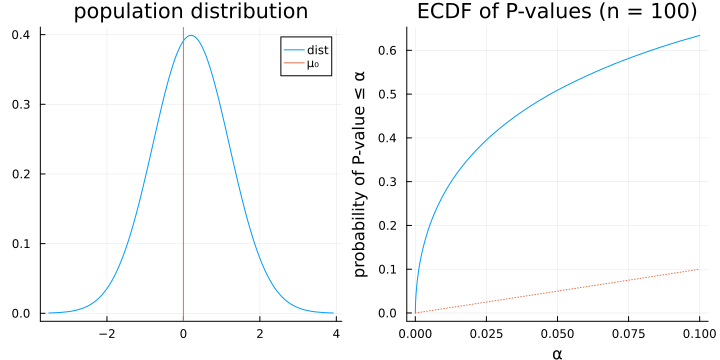

In [8]:
plot_1_sample_t_test(; dist = Normal(0.2, 1), μ₀ = 0, n = 100)

(probability of P-value ≤ 0.05) = 0.802941


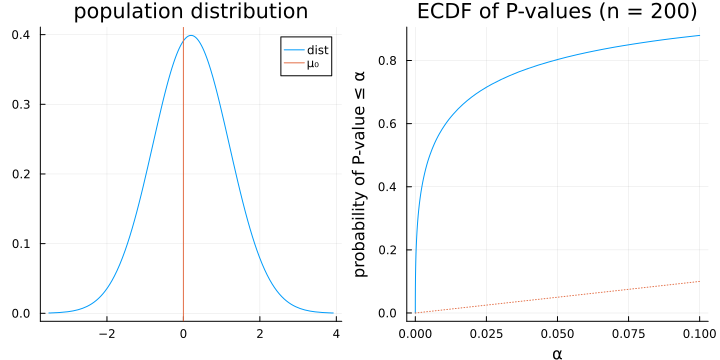

In [9]:
plot_1_sample_t_test(; dist = Normal(0.2, 1), μ₀ = 0, n = 200)

dist = Gamma(20, 3) = Gamma{Float64}(α=20.0, θ=3.0)
μ = mean(dist) = 60.0
σ = std(dist) = 13.416407864998739
(probability of P-value ≤ 0.05) = 0.052001


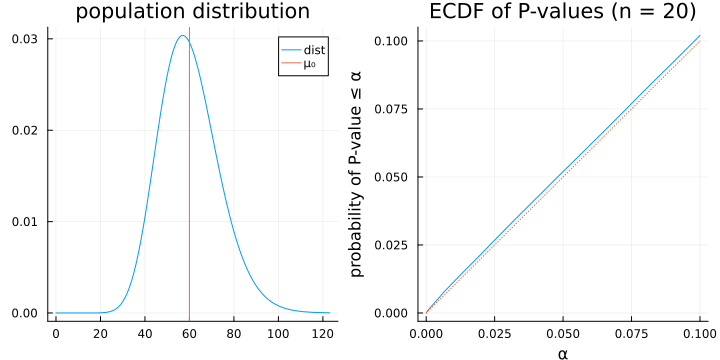

In [10]:
@show dist = Gamma(20, 3)
@show μ = mean(dist)
@show σ = std(dist)
plot_1_sample_t_test(; dist, μ₀ = μ, n = 20)

dist = Gamma(20, 3) = Gamma{Float64}(α=20.0, θ=3.0)
μ = mean(dist) = 60.0
σ = std(dist) = 13.416407864998739
(probability of P-value ≤ 0.05) = 0.156882


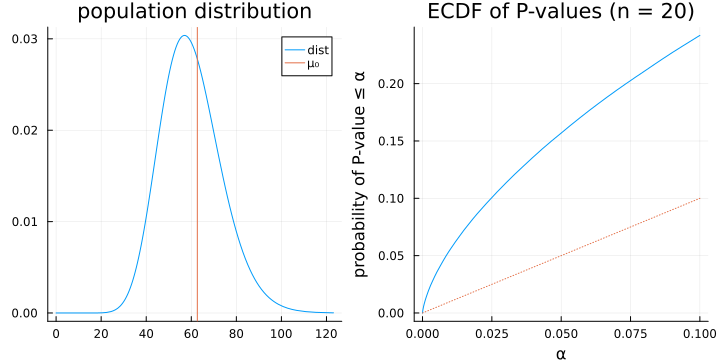

In [11]:
@show dist = Gamma(20, 3)
@show μ = mean(dist)
@show σ = std(dist)
plot_1_sample_t_test(; dist, μ₀ = μ + 0.2σ, n = 20)

dist = Gamma(20, 3) = Gamma{Float64}(α=20.0, θ=3.0)
μ = mean(dist) = 60.0
σ = std(dist) = 13.416407864998739
(probability of P-value ≤ 0.05) = 0.298588


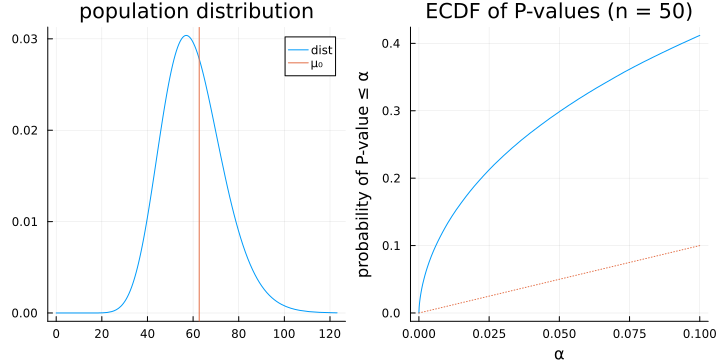

In [12]:
@show dist = Gamma(20, 3)
@show μ = mean(dist)
@show σ = std(dist)
plot_1_sample_t_test(; dist, μ₀ = μ + 0.2σ, n = 50)

dist = Gamma(20, 3) = Gamma{Float64}(α=20.0, θ=3.0)
μ = mean(dist) = 60.0
σ = std(dist) = 13.416407864998739
(probability of P-value ≤ 0.05) = 0.510883


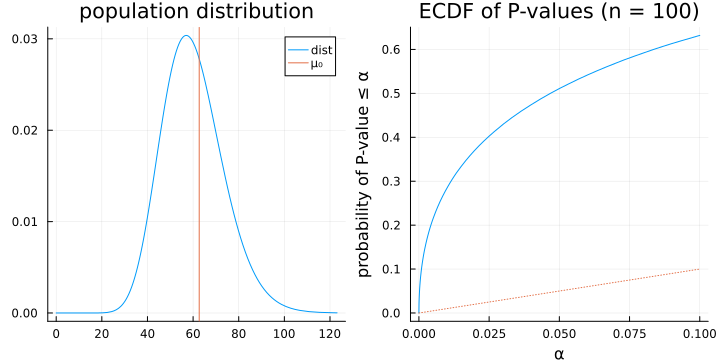

In [13]:
@show dist = Gamma(20, 3)
@show μ = mean(dist)
@show σ = std(dist)
plot_1_sample_t_test(; dist, μ₀ = μ + 0.2σ, n = 100)

dist = Gamma(20, 3) = Gamma{Float64}(α=20.0, θ=3.0)
μ = mean(dist) = 60.0
σ = std(dist) = 13.416407864998739
(probability of P-value ≤ 0.05) = 0.797935


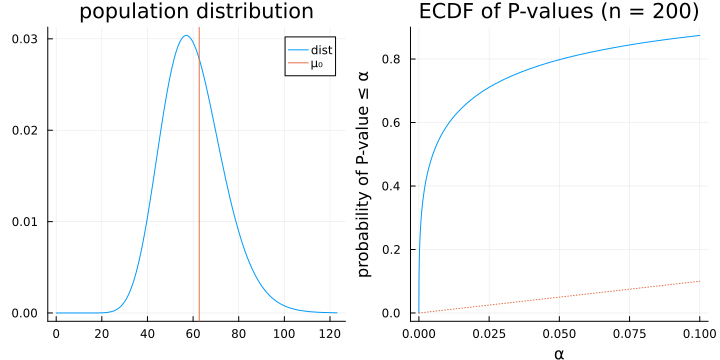

In [14]:
@show dist = Gamma(20, 3)
@show μ = mean(dist)
@show σ = std(dist)
plot_1_sample_t_test(; dist, μ₀ = μ + 0.2σ, n = 200)

dist = Gamma(2, 3) = Gamma{Float64}(α=2.0, θ=3.0)
μ = mean(dist) = 6.0
σ = std(dist) = 4.242640687119285
(probability of P-value ≤ 0.05) = 0.066641


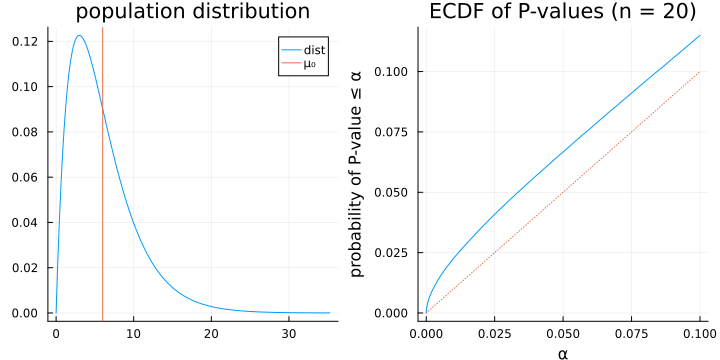

In [15]:
@show dist = Gamma(2, 3)
@show μ = mean(dist)
@show σ = std(dist)
plot_1_sample_t_test(; dist, μ₀ = μ, n = 20)

dist = Gamma(2, 3) = Gamma{Float64}(α=2.0, θ=3.0)
μ = mean(dist) = 6.0
σ = std(dist) = 4.242640687119285
(probability of P-value ≤ 0.05) = 0.053936


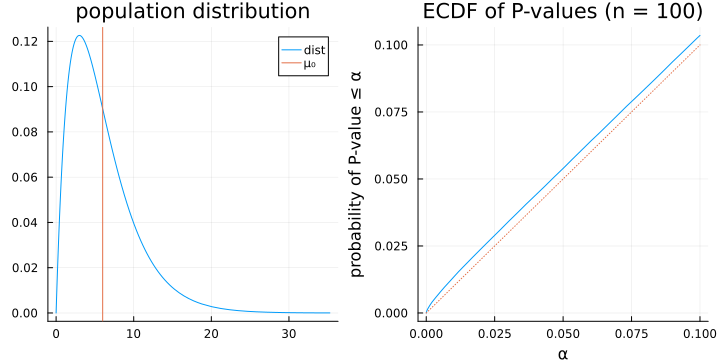

In [16]:
@show dist = Gamma(2, 3)
@show μ = mean(dist)
@show σ = std(dist)
plot_1_sample_t_test(; dist, μ₀ = μ, n = 100)

dist = Gamma(2, 3) = Gamma{Float64}(α=2.0, θ=3.0)
μ = mean(dist) = 6.0
σ = std(dist) = 4.242640687119285
(probability of P-value ≤ 0.05) = 0.519429


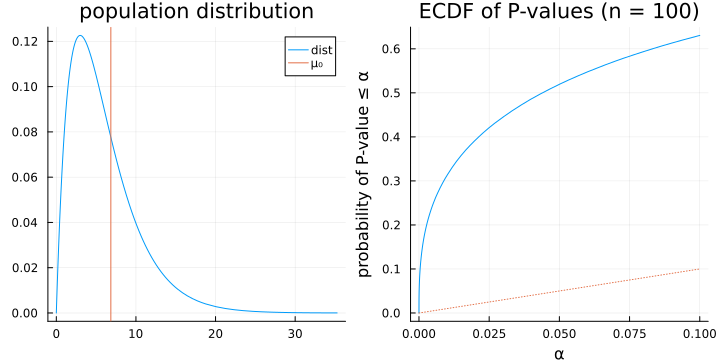

In [17]:
@show dist = Gamma(2, 3)
@show μ = mean(dist)
@show σ = std(dist)
plot_1_sample_t_test(; dist, μ₀ = μ + 0.2σ, n = 100)

dist = Gamma(2, 3) = Gamma{Float64}(α=2.0, θ=3.0)
μ = mean(dist) = 6.0
σ = std(dist) = 4.242640687119285
(probability of P-value ≤ 0.05) = 0.784735


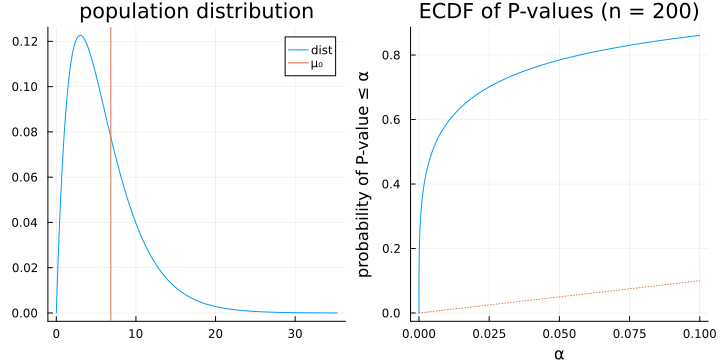

In [18]:
@show dist = Gamma(2, 3)
@show μ = mean(dist)
@show σ = std(dist)
plot_1_sample_t_test(; dist, μ₀ = μ + 0.2σ, n = 200)

(probability of P-value ≤ 0.05) = 0.049869


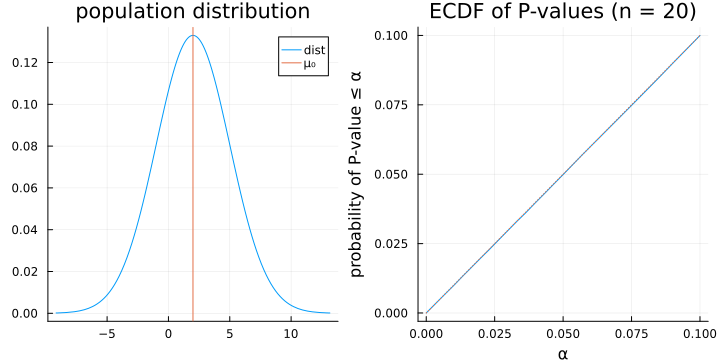

In [19]:
using Random
using StatsBase: ecdf

function plot_1_sample_t_test_revised(; dist=Normal(2, 3), μ₀=mean(dist), n=20, α=0.05, niters=10^6)
    P = plot(dist; label="dist", title="population distribution")
    vline!([μ₀]; label="μ₀")

    nth = Threads.nthreads()
    Xtmp = [zeros(n) for _ in 1:nth]
    pval = zeros(niters)
    Threads.@threads for i in 1:niters
        tid = Threads.threadid()
        X = rand!(dist, Xtmp[tid])
        pval[i] = pvalue_1_sample_t_test(X, μ₀)
    end
    
    _pval = ecdf(pval)
    ecdf_pval(x) = _pval(x)
    println("(probability of P-value ≤ $α) = ", ecdf_pval(α))
    
    Q = plot(α -> ecdf_pval(α), 0, 0.1; label="", title="ECDF of P-values (n = $n)")
    plot!(identity; label="", ls=:dot)
    plot!(xguide="α", yguide="probability of P-value ≤ α")

    plot(P, Q; size=(720, 360))
end

plot_1_sample_t_test_revised()

(probability of P-value ≤ 0.05) = 0.04993
  2.655129 seconds (1.66 M allocations: 7.761 GiB, 45.98% gc time)
(probability of P-value ≤ 0.05) = 0.05001
  0.680118 seconds (662.52 k allocations: 218.047 MiB, 4.82% gc time)


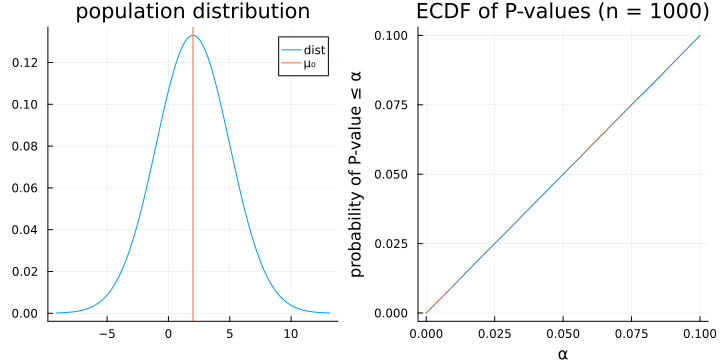

In [20]:
@time plot_1_sample_t_test(; n=1000)
@time plot_1_sample_t_test_revised(; n=1000)